In [46]:
import os
import sys
import datetime

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# on my computer NX2 is not installed, I just import directly from the development directory
sys.path.append(os.path.abspath('../'))
import NX2
import NX2.polar
import NX2.math
sys.path.append(os.path.abspath('.'))
import utils

datapath = '/home/moritz/Dropbox/NX2/'
datapath = '/melkor/d1/guenther/Dropbox/NX2/'
plotpath = os.path.join(datapath, '2013/')

%matplotlib inline

ENTWURF = False

Reading new format NX2 table - Export with 1.08 or later


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 14 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 14 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWA
Maximum data gap is 14 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TWS
Maximum data gap is 14 lines.
  v)) for g, v in itertools.groupby(index) if not g])))


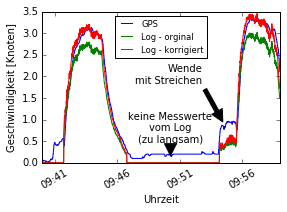

In [70]:
### Korrektur der BSP
dat = NX2.NX2Table(datapath+'/2011/20110504_third_day_with_mast+rah.00.csv', (4,5,2011))
d = dat.when(t1=(9,40,0),t2=(9,58,59))

ind = (d.BSP > 1.)
#mean(d.SOG[ind]/d.BSP[ind])
#d.BSP = d.BSP * 1.145
fig = plt.figure(figsize=(4,3))
fig.canvas.set_window_title('Bootsgeschwindigkeit')
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M', tz=None))
sog = ax.plot(d.datetime(), d.SOG, label='GPS')
bsp = ax.plot(d.datetime(), d.BSP, label='Log - orginal')
bsp2 = ax.plot(d.datetime(), d.BSP * 1.145, label='Log - korrigiert')
xlab = ax.get_xticklabels()
for label in xlab: label.set_rotation(30)
ax.set_xlabel('Uhrzeit')
ax.set_ylabel('Geschwindigkeit [Knoten]')
#ax.set_title('korrigierte Geschwindigkeiten')
ax.legend(loc = 'upper center', prop={'size':'small'})

ax.annotate('Wende\nmit Streichen', xy=(d.datetime()[850], .9),  xycoords='data',
                xytext=(d.datetime()[750], 2.3), textcoords='data',
                arrowprops=dict(facecolor='black', shrink=0.05),
                horizontalalignment='right', verticalalignment='top',
                )
ax.annotate('keine Messwerte\nvom Log\n(zu langsam)', xy=(d.datetime()[600], .15),  xycoords='data',
                xytext=(d.datetime()[600], 1.2), textcoords='data',
                arrowprops=dict(facecolor='black', shrink=0.05),
                horizontalalignment='center', verticalalignment='top',
                )
if ENTWURF: fig.text(.5,.5, 'ENTWURF', rotation=45,ha='center', va='center', fontsize=35, alpha=.5, color='grey')
fig.subplots_adjust(bottom=.2, right=0.95)
fig.savefig(plotpath + '/corr_BSP2.pdf', transparent=True)


Reading new format NX2 table - Export with 1.08 or later


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LAT
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LON
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 5 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 5 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column DFT
Maximum data gap is 2 lines.
  v)) 

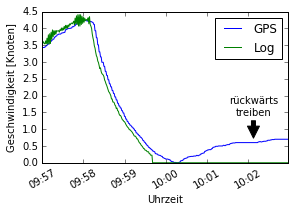

In [69]:
dat = NX2.NX2Table(datapath+'/2011/20110505_fourth_day_with_mast+rah.00.csv', (5,5,2011))
d = dat.when(t1=(9,57,0),t2=(10,02,59))
d.BSP = d.BSP * 1.13
fig = plt.figure(figsize=(4,3))
fig.canvas.set_window_title('Bootsgeschwindigkeit')
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M', tz=None))
sog = ax.plot(d.datetime(), d.SOG, label='GPS')
bsp = ax.plot(d.datetime(), d.BSP, label='Log')
xlab = ax.get_xticklabels()
for label in xlab: label.set_rotation(30)
plt.xlabel('Uhrzeit')
plt.ylabel('Geschwindigkeit [Knoten]')
#plt.title('Ausgleiten')
plt.legend(loc = 'upper right')
plt.annotate(u'rückwärts\ntreiben', xy=(d.datetime()[300], .7),  xycoords='data',
                xytext=(d.datetime()[300], 2), textcoords='data',
                arrowprops=dict(facecolor='black', shrink=0.05),
                horizontalalignment='center', verticalalignment='top',
                )
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25, right=0.98, top=0.95)
if ENTWURF: fig.text(.5,.5, 'ENTWURF', rotation=45,ha='center', va='center', fontsize=35, alpha=.5, color='grey')
plt.savefig(plotpath+'/Ausgleiten.pdf', transparent=True)


Reading new format NX2 table - Export with 1.08 or later


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 1 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column AWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWA contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:156: NX2InterpolationWarning: column TWS contains more than 2% nans. No automatic interpolation performed.
  warn(NX2InterpolationWarning(name))


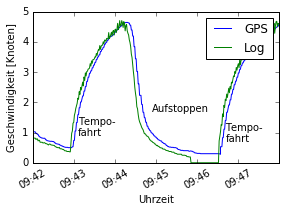

In [68]:
dat = NX2.NX2Table(datapath+'/2011/20110506_fifth_day_with_mast+rah_quer.00.csv', (6,5,2011))
d = dat.when(t1=(9,42,0),t2=(9,47,59))
d.BSP = d.BSP * 1.13
fig = plt.figure(figsize=(4,3))
fig.canvas.set_window_title('Bootsgeschwindigkeit')
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M', tz=None))
sog = ax.plot(d.datetime(), d.SOG, label='GPS')
bsp = ax.plot(d.datetime(), d.BSP, label='Log')
xlab = ax.get_xticklabels()
for label in xlab: label.set_rotation(30)
plt.xlabel('Uhrzeit')
plt.ylabel('Geschwindigkeit [Knoten]')
#plt.title('Aufstoppen')
plt.legend(loc = 'upper right')
plt.text(d.datetime()[65], .9, 'Tempo-\nfahrt')
plt.text(d.datetime()[170], 1.7, 'Aufstoppen')
plt.text(d.datetime()[275], .7, 'Tempo-\nfahrt')
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25, right=0.98, top=0.95)
if ENTWURF: fig.text(.5,.5, 'ENTWURF', rotation=45,ha='center', va='center', fontsize=35, alpha=.5, color='grey')
plt.savefig(plotpath+'/Aufstoppen.pdf', transparent=True, bb_inches="tight")


Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 19 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LAT
Maximum data gap is 6 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LON
Maximum data gap is 6 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column DFT
Maximum data gap is 8 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column SET
Maximum data gap is 6 lines.
  v)

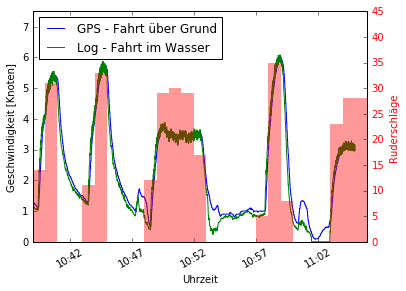

In [67]:
dat22 = NX2.NX2Table(datapath + '2011/20110522_fourteenth_day_without_mast+rah.00.csv', (22,05,2011))
dat22.add_rowing_old_format(datapath + '/2011/Ruderschlaege2011.csv')

fig = plt.figure()
fig.canvas.set_window_title('Bootsgeschwindigkeit')
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M', tz=None))

ind = (dat22.time() >= datetime.time(10,39,00)) & (dat22.time() <= datetime.time(11,5,00))

sog = ax.plot(dat22.datetime()[ind], dat22.SOG[ind], label=u'GPS - Fahrt über Grund')
bsp = ax.plot(dat22.datetime()[ind], dat22.BSP[ind]/0.87, label=u'Log - Fahrt im Wasser')
ax.legend(loc = 'upper left')
xlab = ax.get_xticklabels()
for label in xlab: label.set_rotation(30)
lab = plt.ylabel('Geschwindigkeit [Knoten]')
lab = plt.xlabel('Uhrzeit')
        
ax2 = ax.twinx()
index = dat22.minutes_index() & ind
minutes = np.array(map(lambda x: x.replace(second = 0, microsecond=0), dat22.datetime()[index]))
row = ax2.bar(minutes, dat22.rowpermin[index], label=u'Ruderschläge', width=1./24./60., linewidth = 0., alpha = 0.4, color='r')
ax2.set_ylabel(u'Ruderschläge', color='r')
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M', tz=None))
for tl in ax2.get_yticklabels():
    tl.set_color('r') 
fig.subplots_adjust(bottom = .15, top=.95)
ax.set_ylim([0, 7.5])
ax2.set_ylim([0, 45])
if ENTWURF: fig.text(.5,.5, 'ENTWURF', rotation=45,ha='center', va='center', fontsize=35, alpha=.5, color='grey')
fig.savefig(plotpath+'Ruderstrecke.pdf', transparent=True)

Reading new format NX2 table - Export with 1.08 or later
Input data does not contain info on month and year.
Load rowing data
Load sailing data


/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column TIME
Maximum data gap is 9 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LAT
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column LON
Maximum data gap is 2 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWA
Maximum data gap is 14 lines.
  v)) for g, v in itertools.groupby(index) if not g])))
/melkor/d1/guenther/soft/python/NX2/NX2/NX2.py:220: NX2InterpolationWarning: Interpolating over missing values in column AWS
Maximum data gap is 14 lines.
  v

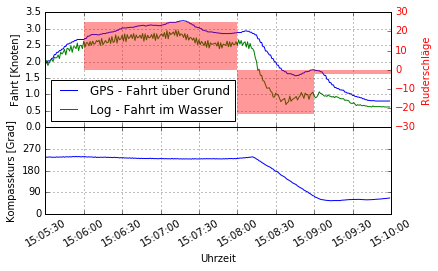

In [65]:
dat = NX2.NX2Table(datapath + '2011/20110511_eigth_day_with_mast+rah_quer.00.csv', (11, 5,2011))
dat.add_rowing_old_format(datapath + '/2011/Ruderschlaege2011.csv')

t1 = (15, 5, 30)
t2 = (15, 9, 59)


fig = plt.figure()
axang = fig.add_axes([0.1, 0.2, 0.8, 0.3]) # left, bottom, width, height
ax = fig.add_axes([0.1, 0.5, 0.8, 0.4], sharex=axang)
ax2 = ax.twinx()


# plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

ind = (dat.time() >= datetime.time(*t1)) & (dat.time() <= datetime.time(*t2))

sog = ax.plot(dat.datetime()[ind], dat.SOG[ind], label=u'GPS - Fahrt über Grund')
bsp = ax.plot(dat.datetime()[ind], dat.BSP[ind], label=u'Log - Fahrt im Wasser')


if 'rowpermin' in dat.keys():
    index = dat.minutes_index() & ind
    minutes = np.array(map(lambda x: x.replace(second=0, microsecond=0), dat.datetime()[index]))
    row = ax2.bar(minutes, dat.rowpermin[index], label=u'Ruderschläge', width=1./24./60., linewidth=0., alpha=0.4, color='r')
    ax2.set_ylabel(u'Ruderschläge', color='r')
    ax2.xaxis.set_major_formatter(plt.NullFormatter())

for tl in ax2.get_yticklabels():
    tl.set_color('r')

axang.plot(dat.datetime()[ind], dat.HDC[ind], label='HDC')
axang.set_ylim([0, 360])
ax.tick_params(labelbottom='off')
axang.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M:%S', tz=None))


xlab = axang.get_xticklabels()
for label in xlab:
    label.set_rotation(30)
axang.set_yticks([0, 90, 180, 270])    
axang.set_xlabel('Uhrzeit')
axang.set_ylabel('Kompasskurs [Grad]')
ax.set_ylabel('Fahrt [Knoten]')

ax.legend(loc='lower left')
ax.grid()
axang.grid()
ax.set_ylim([0, 3.5])
fig.subplots_adjust(bottom = .15, top=.95)
if ENTWURF: fig.text(.5,.5, 'ENTWURF', rotation=45,ha='center', va='center', fontsize=35, alpha=.5, color='grey')
fig.savefig(plotpath+'Wende.pdf', transparent=True)